# NLP Hands-on: Twitter US Airline Sentiment Analysis

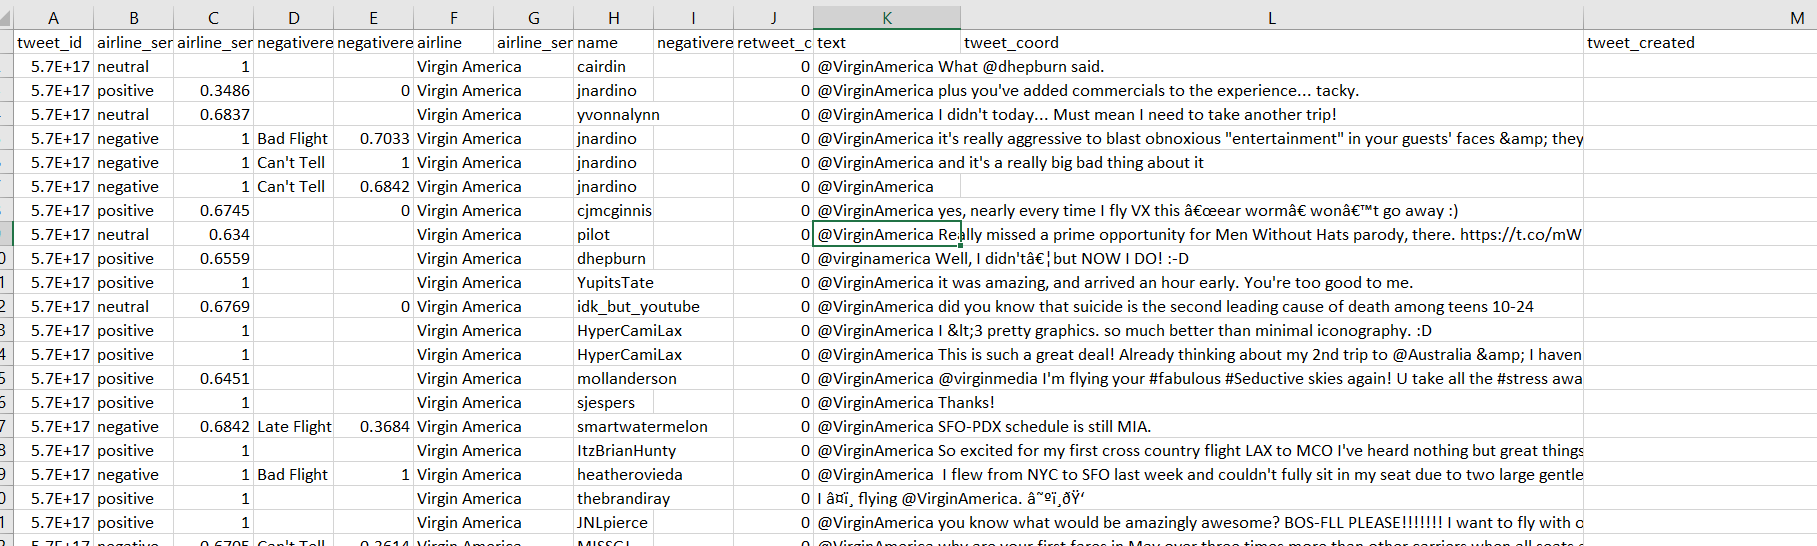

## Objective: To classify the `sentiment of tweets` into one of the three categories: `positive`, `negative` and `neutral`

### Data Description:

 - `Source`: `Twitter` -- coming from a project on Kaggle
 - `Description`: -- Passengers tweets about airline performance, having sentiments about their journey

# **Learning Outcomes**:
- Text based Exploratory Data Analysis
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Tune & Evaluate the Model performance.
- Plot the  important features after training the model.

In [6]:
!pip install contractions

In [7]:
import re, string, unicodedata # import Regex, String and unicodedata
import contractions            # Import contractions library
from bs4 import BeautifulSoup  # Import BeautifulSoup


import numpy as np
import pandas as pd
import nltk                   ## Import Natural Language Tool-kit


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data into `Pandas DataFrame`

In [9]:
import os
os.getcwd()

'C:\\Users\\thesi\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\02. AI and DL IITR-20Jul2024'

In [10]:
data = pd.read_csv("Tweets.csv")

In [11]:
data.sample(2).T

,13080,14122
tweet_id,569944699877724160,569664191574859777
airline_sentiment,negative,negative
airline_sentiment_confidence,1.0,1.0
negativereason,Customer Service Issue,Late Flight
negativereason_confidence,0.6246,0.3601
airline,American,American
airline_sentiment_gold,NaN,NaN
name,miajain,SentieriMelinda
negativereason_gold,NaN,NaN
retweet_count,0,0


### Identifying the missing values

In [13]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [14]:
data.isnull().sum()/len(data)*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

### Let us do some amazing EDA - Exploratory Data Analysis

### `Percentage of tweets` by airline companies

In [17]:
import seaborn as sns

C:\Users\thesi\AppData\Local\Temp\ipykernel_25252\1779199765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='airline', palette = 'Paired')


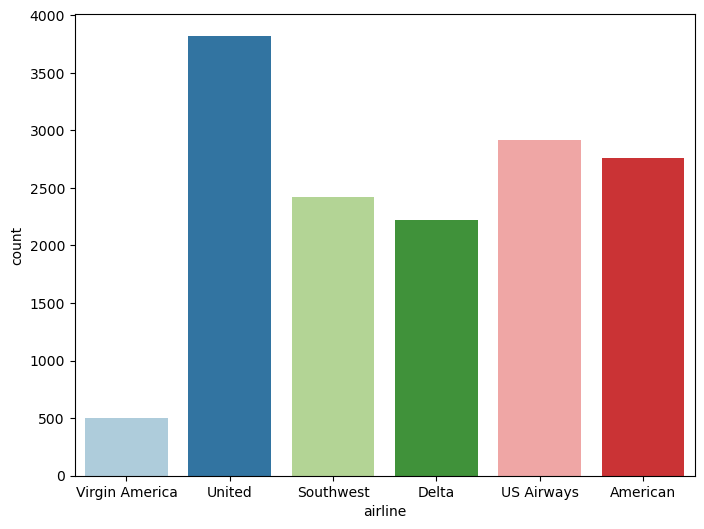

In [18]:
plt.subplots(figsize=(8,6))

sns.countplot(data=data, x='airline', palette = 'Paired')

plt.show()

In [19]:
print("Total number of tweets:", data['text'].count())

Total number of tweets: 14640


#### - We can see the percentage of tweets for `United Airlines` has the highest number of tweets ~ 26%, followed by `US Airways` (20%)

### `Distribution of Sentiments` across all tweets

C:\Users\thesi\AppData\Local\Temp\ipykernel_25252\2300196286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='airline_sentiment', palette ='Paired')


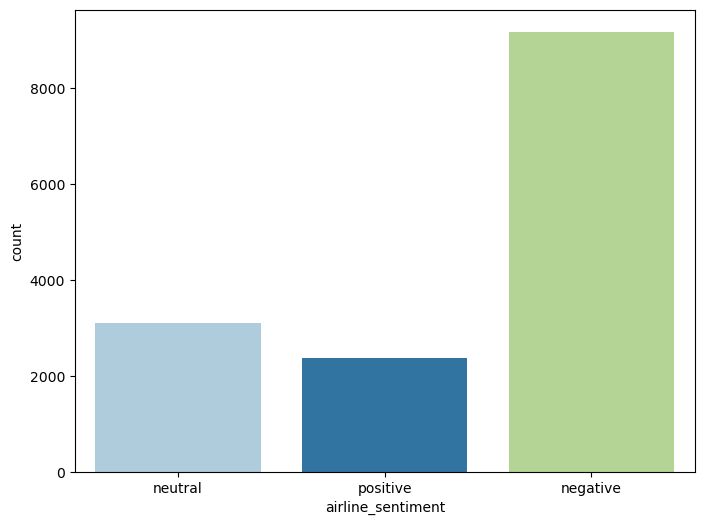

In [22]:
plt.subplots(figsize=(8,6))
sns.countplot(data=data,x='airline_sentiment', palette ='Paired')
plt.show()

#### Let us see some `negative` comments

In [24]:
sel_neg = data['airline_sentiment']=='negative'
data[sel_neg]['text'].sample(5).tolist()

["“@USAirways: We're sincerely sorry, Sean. Reservations is working hard to answer everyone's call and we appreciate your patience.” #false",
 "But, are your flight attendants fucking tho? RT @JetBlue: Our fleet's on fleek. http://t.co/wGYzTnjCXm",
 '@SouthwestAir 10+ people pre boarded\nOnly 1 needed a wheel chair off the plane... Was NOT the case boarding',
 '@AmericanAir On hold for 20 mins and then used the call back service only to have an agent call me and put me on hold forever-anyone there?',
 '@USAirways can I speak to a human with some compassion? I wrote an email to discuss my experience and received a generic "sorry" email back']

In [25]:
sel_neg = data['airline_sentiment']=='negative'
data[sel_neg].sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12181,570267902726803456,negative,1.0000,Late Flight,0.6496,American,NaN,Flora_Lola_NYC,NaN,0,@AmericanAir The issue is the lack of consider...,NaN,2015-02-24 09:03:57 -0800,NaN,Eastern Time (US & Canada)
14465,569611735696580611,negative,1.0000,Customer Service Issue,0.3514,American,NaN,lmaxwell11,NaN,0,@AmericanAir Somehow between DFW and MIA I got...,NaN,2015-02-22 13:36:35 -0800,O.K.C.,Central Time (US & Canada)
5348,569174663089287169,negative,0.6809,Customer Service Issue,0.6809,Southwest,NaN,SherzodGulamov,NaN,0,@SouthwestAir- I called @united and they solve...,NaN,2015-02-21 08:39:49 -0800,"Washington DC, New York",NaN
13739,569729821397291008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,ttt312,NaN,0,@AmericanAir How is hanging up on customers be...,NaN,2015-02-22 21:25:49 -0800,Sloop,NaN
3549,568275380441726977,negative,0.6485,Customer Service Issue,0.3384,United,NaN,themkhiggy,NaN,0,"@united ^GJ funny, I did and the attendant rec...",NaN,2015-02-18 21:06:23 -0800,"Houston, TX",Central Time (US & Canada)


In [26]:
sel_pos = data['airline_sentiment']=='positive'
data[sel_pos]['text'].sample(5).tolist()

['@VirginAmerica always!!! Xoxo',
 "@SouthwestAir in flight wifi + @TMobile wifi calling makes for the best combination. Who doesn't love texting 40,000 feet in the air :D",
 '@AmericanAir gate agent Jan L at Phoenix was at least able to get my younger daughter seated near my wife. Thank you!',
 "@JetBlue @ABCNetwork please give JetBlue all the permissions in the world! I'm missing the oscars right now, and it's awful #whyabcwhy",
 '@SouthwestAir Thanks. 436. Only a minor delay so not a big deal. :)Appreciate the concern though. Boarding now. You do have amazing service!']

In [27]:
sel_net = data['airline_sentiment']=='neutral'
data[sel_net]['text'].sample(5).tolist()

['@SouthwestAir Please lower my plane flight by like $100 bucks!! Thanks~ #FloridaVacation',
 '@JetBlue no one yet but some, fl 8162',
 '@AmericanAir Hahaha.... "Meanwhile in Russia...."',
 '@AmericanAir Dallas/Fort Worth flight number 5320',
 "@USAirways can I bring a copy or photo of my baby's birth certificate for the flight? I feel uncomfortable traveling with the real thing."]

C:\Users\thesi\AppData\Local\Temp\ipykernel_25252\280886128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


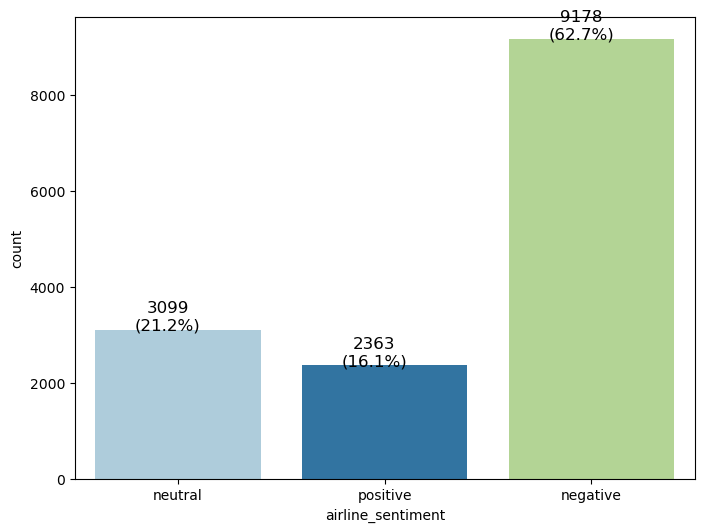

In [28]:
# Assuming 'data' is your DataFrame and 'airline_sentiment' is your column of interest
plt.subplots(figsize=(8, 6))

# Plot the countplot
ax = sns.countplot(
    data=data,
    x='airline_sentiment',
    palette='Paired'
)

# Calculate total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar (count)
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.05  # Adjust x position for better alignment
    y = p.get_height() + 0.5  # Adjust y position to place above the bar
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  # Annotate the plot

plt.show()


##### 
- Majority of tweets are `negative` as expected (63%), followed by neutral tweets (21%), and then the positive tweets (16%)
- It's common for people to get`Twitter` and rant about the bad `customer service`

### `Distribution of Sentiments of Tweets` for each airline

In [31]:
airline_sentiment_grp = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()

In [32]:
airline_sentiment_grp

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


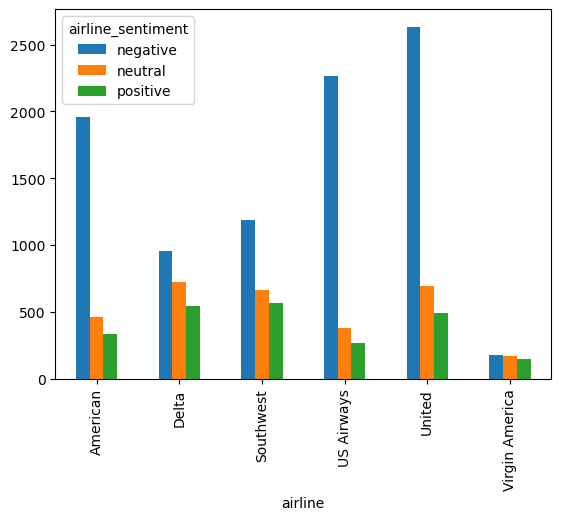

In [33]:
airline_sentiment_grp.plot(kind='bar')
plt.show()

### Task: Plot the stack bar chart showing `% split of sentiment for each airline`

- It is evident from the output that for almost all the airlines, the majority of the tweets are `negative`, followed by `neutral` and `positive` tweets

- `Virgin America` is probably the only airline where the ratio of the three sentiment groups is `somewhat similar`

## Let us deep dive on the `negative reasons`

C:\Users\thesi\AppData\Local\Temp\ipykernel_25252\3543353604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='negativereason', palette ='Paired')


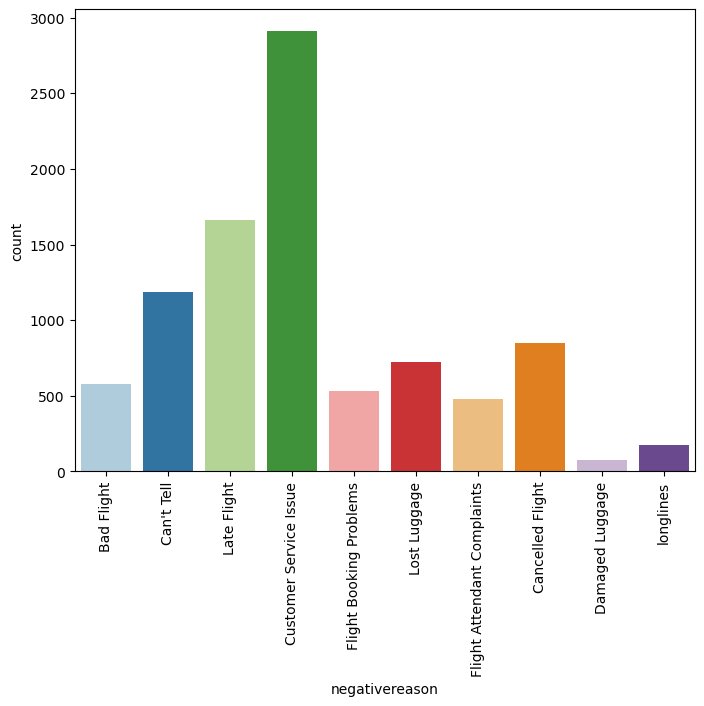

In [37]:
plt.subplots(figsize=(8,6))

sns.countplot(data=data, x='negativereason', palette ='Paired')

# Rotate the x-tick labels 
plt.xticks(rotation=90)

plt.show()


- **`Customer Service` is the top reason for negative sentiments**

### Let us start with `word cloud` for `negative tweets`

In [40]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud,STOPWORDS

In [43]:
neg_df = data[data['airline_sentiment']=='negative'] # filtered for negative sentiments
words = ' '.join(neg_df['text']) #combines all the tweets (stored in the column'text') into a single string, where each tweet is separated by space

In [44]:
# words

### Cleaning the combined string - leveraging `list comprehension`

In [46]:
cleaned_text = " ".join([word for word in words.split() #splitting the words string into indiviual words based on whitespace
                         if 'http' not in word #exclude any word that contains "http"
                         and not word.startswith('@') #exclude words which start with "@" symbol
                         and word != "RT" # excludes "RT"
                        ])
    

In [47]:
# cleaned_text

In [48]:
wordcloud = WordCloud(stopwords=STOPWORDS, #exclude common stopwords
                     background_color=  'white',
                     width=3000,
                     height= 2500).generate(cleaned_text)

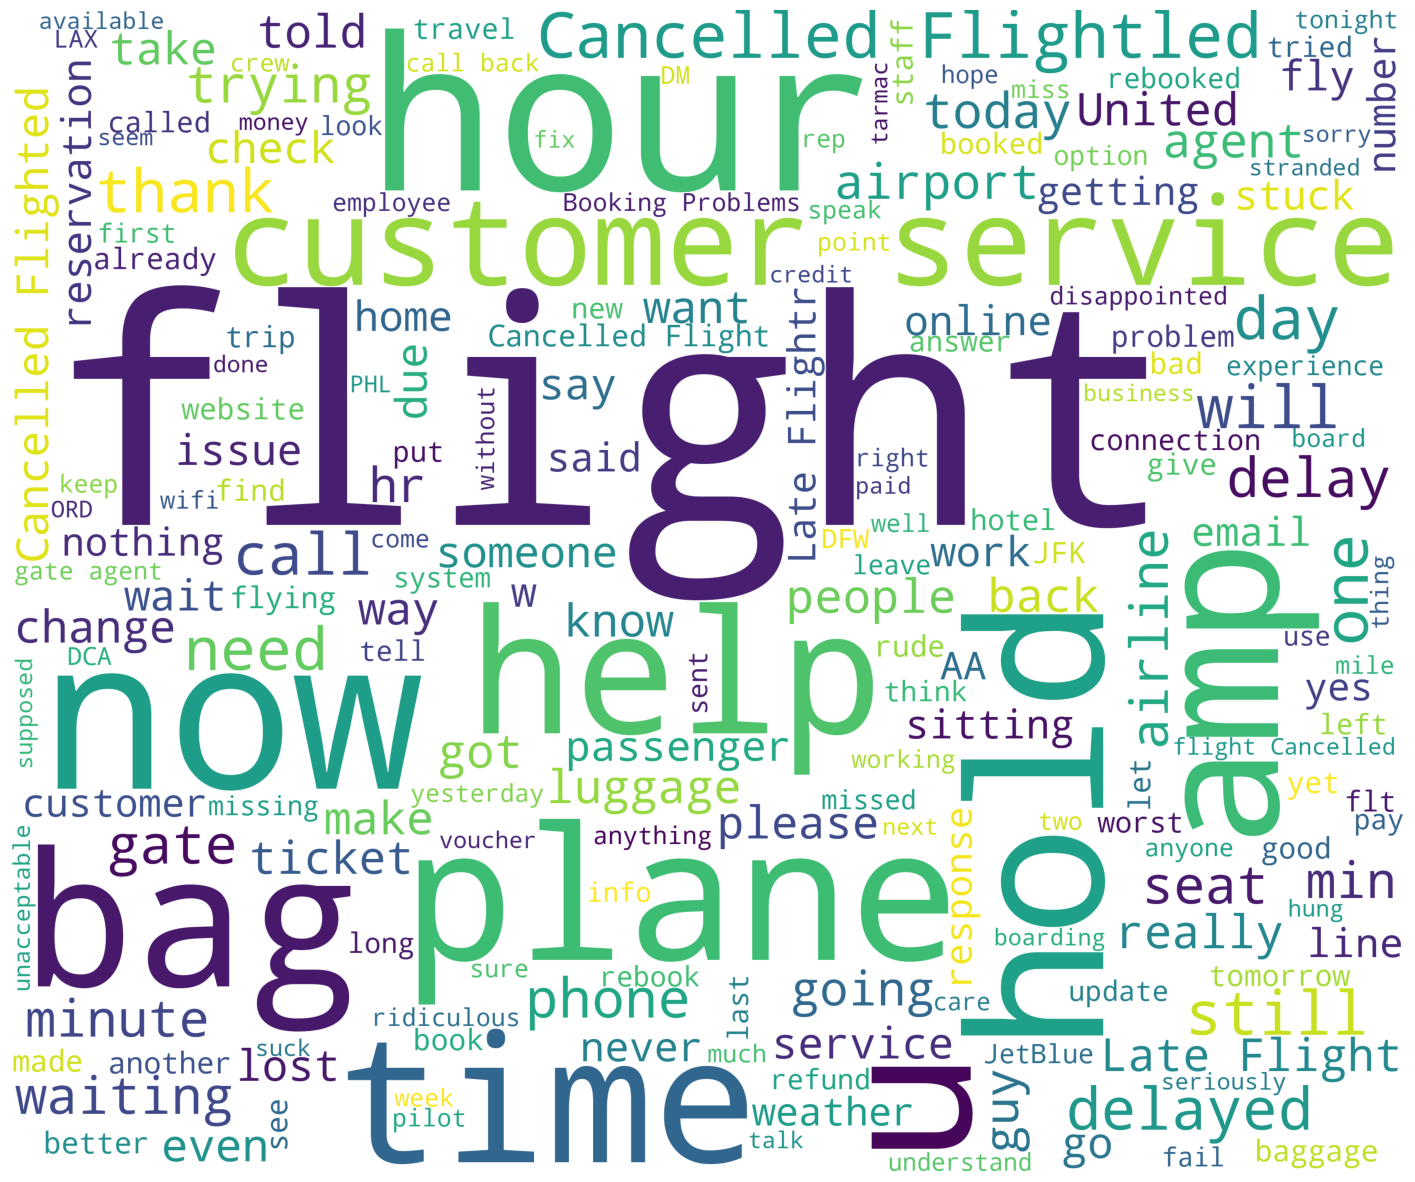

In [49]:
plt.subplots(figsize=(18,18))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

https://www.nltk.org/

### Data Preprocessing Steps
    - Remove html tags
    - Replace contractions in strings (e.g., replace I'm --> I am)
    - Remove numbers
    - Tokenization
    - To remove stopwords
    - Lemmatized the data
    

In [52]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

#### Remove `html` tags

In [54]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x:strip_html(x)) #lambda function takes the entry and passes to strip_html function to remove the html tags

C:\Users\thesi\AppData\Local\Temp\ipykernel_25252\1469612519.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [55]:
data['text'].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [56]:
sample_tags = pd.DataFrame({'text': ['<h1>Hello, World!</h1>']})

In [57]:
sample_tags

,text
0,"<h1>Hello, World!</h1>"


In [58]:
sample_tags['text'] = sample_tags['text'].apply(lambda x :strip_html(x))

In [59]:
sample_tags

,text
0,"Hello, World!"


### Replace contractions in string. (e.g. replace I'm --> I am) and so on.\

In [61]:
def replace_contractions(text):
    '''
    replace contractions in the string

    '''
    return contractions.fix(text)


data['text'] = data['text'].apply(lambda x: replace_contractions(x)) #lambda function takes the entry and passed to replace_contractions function to remove contractions such as I'm --> I am

In [62]:
data['text'].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you have added commercials...
2    @VirginAmerica I did not today... Must mean I ...
3    @VirginAmerica it is really aggressive to blas...
4    @VirginAmerica and it is a really big bad thin...
Name: text, dtype: object

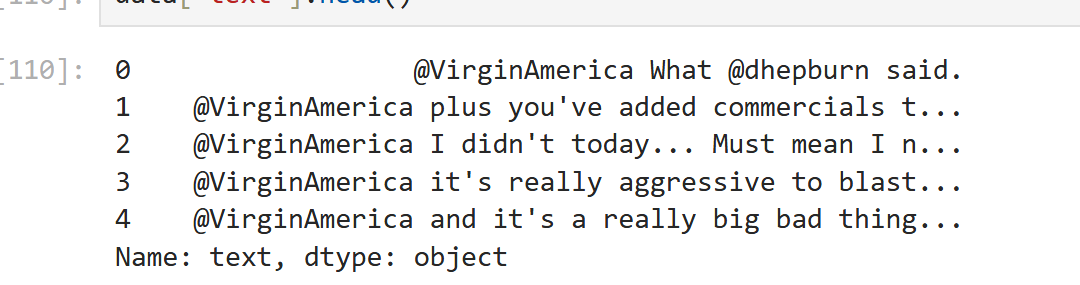

### Remove Numbers

In [65]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

`\d` --> matches any digits `[0-9]`

`+` --> means one or more of the preceding character --> `\d+` matches one or more digits

##### re.sub(pattern, replacement, string): This function replaces `occurrences of a pattern` in the given string with a `replacement string`.

In [68]:
data['text'].tail(5)

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, dtype: object

In [69]:
data['text'] = data['text'].apply(lambda x: remove_numbers(x))

In [70]:
data['text'].tail()

14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, dtype: object

### Tokenization

- Tokenization is the process of splitting texts into `individual units` such as words or tokens, which can be useful for various NLP tasks

In [80]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt') #NLTK tokenizer models

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thesi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
data['text'][9]

'@VirginAmerica it was amazing, and arrived an hour early. You are too good to me.'

####  Work on the below error - self note it to APC

In [85]:
# data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) #tokenization of data

In [87]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

data['text'] = data['text'].apply(lambda x: tokenizer.tokenize(x))


In [92]:
data['text']

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, have, added, com...
2        [@, VirginAmerica, I, did, not, today, ..., Mu...
3        [@, VirginAmerica, it, is, really, aggressive,...
4        [@, VirginAmerica, and, it, is, a, really, big...
                               ...                        
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Name: text, Length: 14640, dtype: object

### Using `spaCy`: for more advanced tokenization and additional NLP features

https://spacy.io/

-- Language specific rules: - 'can't' --> ["ca", "n't"]

### To remove stopwords


In [101]:
stopwords = stopwords.words('english')

In [103]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [104]:
print(type(stopwords))

<class 'list'>


### Below is the list of `custom words` which we want to keep

In [106]:
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [107]:
stopwords = list(set(stopwords) - set(customlist))

In [108]:
stopwords

['will',
 'having',
 'most',
 'from',
 'itself',
 'his',
 "that'll",
 'at',
 'll',
 'to',
 'hers',
 'them',
 "it's",
 'under',
 'these',
 'was',
 'ain',
 'when',
 'where',
 'any',
 'our',
 'after',
 'again',
 'we',
 'into',
 "you'd",
 'up',
 "you're",
 'what',
 'off',
 'm',
 'about',
 're',
 'had',
 'should',
 'than',
 'he',
 'being',
 'those',
 'own',
 'this',
 'herself',
 'no',
 'myself',
 'if',
 'because',
 'with',
 "should've",
 'theirs',
 'are',
 'over',
 'am',
 'until',
 'that',
 'yourself',
 'were',
 'been',
 'by',
 'for',
 'very',
 "aren't",
 'don',
 'only',
 't',
 'other',
 'doing',
 'so',
 'ours',
 'above',
 'himself',
 'why',
 'its',
 'o',
 'couldn',
 'is',
 'the',
 'y',
 'more',
 'd',
 's',
 'during',
 'they',
 'same',
 "you'll",
 'both',
 'below',
 'an',
 'as',
 'too',
 'how',
 'a',
 'now',
 'your',
 'in',
 "she's",
 'further',
 "you've",
 'which',
 'ourselves',
 'such',
 "don't",
 'aren',
 'can',
 'down',
 'there',
 'it',
 'i',
 'then',
 'few',
 'does',
 'she',
 'but',
 '

In [110]:
def remove_non_ascii(words):
    '''
    Remove non-ASCII characters from the list of tokenized words
    '''
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
        return new_words

https://en.wikipedia.org/wiki/ASCII#:~:text=ASCII%20(%2F%CB%88%C3%A6sk,telecommunications%20equipment%2C%20and%20other%20devices.

- **ASCII** - stands for `American Standard Code for Information Exchange`
- Character encoding technique where ASCII codes represent text in computers

### ASCII Characters

- Alphabet: a, b, c, d, ... z

- Uppercase Alphabet: A, B, C, D, ... Z

- Digits: 0, 1, 2, 3, ... 9

- Punctuation Marks: ., !, ?, :, ;, ' , "

- Symbols: @, #, $, %, &, *, +, -, =, /

### Non-ASCII Characters

Special Symbols:

© (copyright symbol)

€ (euro sign)

₹ (rupee sign)

`NFKD`: stands for Normalization From KD (Compatibility Decomposition) -- it takes non-ascii characters and normalizes them

##### Example: The character "é" (e with acute) would be normalized to "e" and "´".

In [118]:
def to_lowercase(words):
    '''
    Convert all characters to lowercase from the list of tokenized words
    '''
    new_words=[]
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
        
    return new_words

In [119]:
def remove_punctuation(words):
    '''
    Remove punctuation from the list of tokenized words
    '''
    new_words=[]
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
        

In [120]:
def remove_stopwords(words):
    '''
    Remove stopwords from the list of tokenized words
    '''
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

### Lemmatization

- It is a text normalization technique in NLP that reduces words to their base or dictionary form, known as lemma

"running" → "run"

"better" → "good"

"cats" → "cat"

In [130]:
lemmatizer = WordNetLemmatizer()

In [131]:
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmmatize(word, pos = 'v')) #get the verb of the words
    return new_words

### Combined function to chain all the above functions

In [133]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn say,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus add commercials experience ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica not today must mean need take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica really aggressive blast obnoxiou...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [134]:
data['text'].tail(5)

14635       americanair thank get different flight chicago
14636    americanair leave minutes late flight warnings...
14637    americanair please bring american airlines bla...
14638    americanair money change flight not answer pho...
14639    americanair people need know many seat next fl...
Name: text, dtype: object

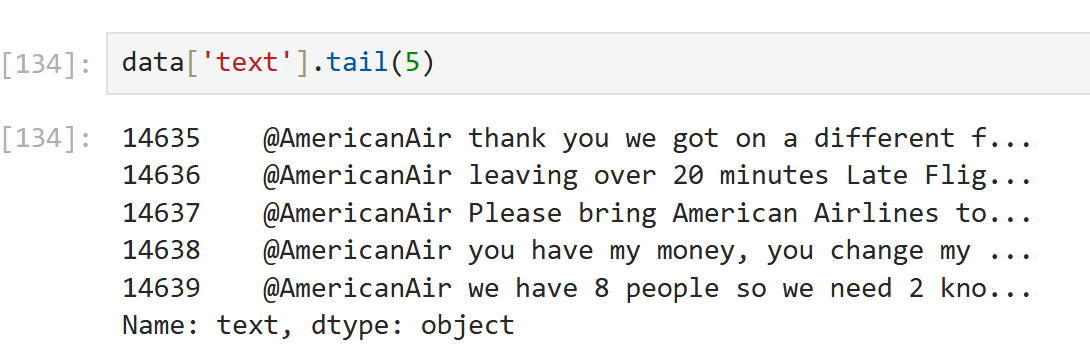

## Build the model

#### Vectorization - converts text data to numbers

In [176]:
from sklearn.feature_extraction.text import CountVectorizer # to convert a collection of text docs into a matrix of token counts

### `Just an example text to understand`

In [192]:
### Example text data

texts = [
    "I love machine learning",
    "Machine learning learning is fun",
    "I enjoy learning"
]

In [194]:
print(texts)

['I love machine learning', 'Machine learning learning is fun', 'I enjoy learning']


In [212]:
### Initialize CountVectorizer
count_vec = CountVectorizer(max_features=100) # set the max # parameters to 100
### Fit and transform the text data
data_features_2 = count_vec.fit_transform(texts)

In [214]:
print(data_features_2)

  (0, 4)	1
  (0, 5)	1
  (0, 3)	1
  (1, 5)	1
  (1, 3)	2
  (1, 2)	1
  (1, 1)	1
  (2, 3)	1
  (2, 0)	1


In [216]:
data_features_2_array = data_features_2.toarray()

In [218]:
### Output the results
print("Vocabulary:", count_vec.get_feature_names_out())
print("Data Features Array:\n", data_features_2_array)

Vocabulary: ['enjoy' 'fun' 'is' 'learning' 'love' 'machine']
Data Features Array:
 [[0 0 0 1 1 1]
 [0 1 1 2 0 1]
 [1 0 0 1 0 0]]


#### Let us go back to the model

In [224]:
data['text'].sample(2)

10708    usairways us airways website double charge peo...
9192     usairways important wait hold get hang compute...
Name: text, dtype: object

In [234]:
Count_vec = CountVectorizer(max_features=5000) #keeping only 5000 featueres as more numbers features will increase the processing time
data_features = Count_vec.fit_transform(data['text'])

`max_features`: signifies the unique number of features (i.e., unique words of tokens) --> 5000

 - Keeping the limit to 5000, it ensures that only `top` 5000 most fequent words are kept in the model

In [237]:
data_features = data_features.toarray()

In [241]:
data_features.shape

(14640, 5000)

In [243]:
data['text'].shape

(14640,)

In [247]:
data['text'][7]

'virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp'

In [257]:
### Output the results
print("Vocabulary:", Count_vec.get_feature_names_out().tolist())


Vocabulary: ['aa', 'aacom', 'aadfw', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'addl', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'afterall', 'afternoon', 'age', 'agency', 'agent', 'agent

In [259]:
X = data_features #training features
y = data.airline_sentiment #training target

### Split data into training and testing set

In [262]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

### Using `Random Forest` to build the model for the classification of tweets (sentiments classification)

In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [271]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=4)
'''
n_estimators=10 --> specifies the number of trees in the forest
n_jobs=4 --> means that up to 4 CPU cores will be used to parallelize the computation, which speeds up the training process

'''

### Training the model
rf_trained = rf.fit(X_train,y_train)

In [273]:
print(rf)

RandomForestClassifier(n_estimators=10, n_jobs=4)


In [279]:
print(np.mean(cross_val_score(rf, X, y, cv=5))) #validation accuracy

0.694603825136612


### Generate accuracy on the test set

In [282]:
print(rf_trained.score(X_test, y_test))

0.7629781420765027


### Next iteration

In [296]:
Count_vec = CountVectorizer(max_features=12000) #keeping only 12000 featueres as more numbers features will increase the processing time
data_features = Count_vec.fit_transform(data['text'])

`max_features`: signifies the unique number of features (i.e., unique words of tokens) --> 15000

 - Keeping the limit to 12000, it ensures that only `top` 12000 most fequent words are kept in the model

In [299]:
data_features = data_features.toarray()

In [301]:
data_features.shape

(14640, 12000)

In [303]:
data['text'].shape

(14640,)

In [305]:
data['text'][7]

'virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp'

In [307]:
### Output the results
print("Vocabulary:", Count_vec.get_feature_names_out().tolist())


Vocabulary: ['__rwg__', '_austrian', '_defcon_', '_emmaclifford', '_exact_', '_justdippin_', '_lucy_may', '_robprice', 'a_life_story_', 'aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aaba', 'aacom', 'aacustomerservice', 'aadavantage', 'aadelay', 'aadfw', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aaron', 'aarp', 'aaso', 'aateam', 'aaus', 'ab', 'aback', 'abandon', 'abandonment', 'abassinet', 'abbreve', 'abc', 'abc_wtvd', 'abcdef', 'abcletjetbluestreamfeed', 'abcnetwork', 'abcnews', 'abcnewsbayarea', 'abduct', 'abi', 'abidfw', 'abigailedge', 'abilities', 'ability', 'able', 'aboard', 'aboout', 'abound', 'abq', 'abroad', 'absolute', 'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd', 'absurdity', 'absurdly', 'abundance', 'abuse', 'abysmal', 'ac', 'acarl', 'acc', 'accelerate', 'accept', 'acceptable', 'acces', 'access', 'accessibility', 'accessible', 'accident', 'accidentally', 'accidents', 'accomidating', 'accommodate', 'accommodation', 'accommodations', 'accompaniments', 'ac

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [311]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=12)
'''
n_estimators=10 --> specifies the number of trees in the forest
n_jobs=4 --> means that up to 4 CPU cores will be used to parallelize the computation, which speeds up the training process

'''

### Training the model
rf_trained = rf.fit(X_train,y_train)

In [313]:
print(rf)

RandomForestClassifier(n_jobs=12)


In [315]:
print(np.mean(cross_val_score(rf, X, y, cv=5))) #validation accuracy

0.7101092896174863


### Generate accuracy on the test set

In [319]:
print(rf_trained.score(X_test, y_test))

0.7784608378870674
